In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.


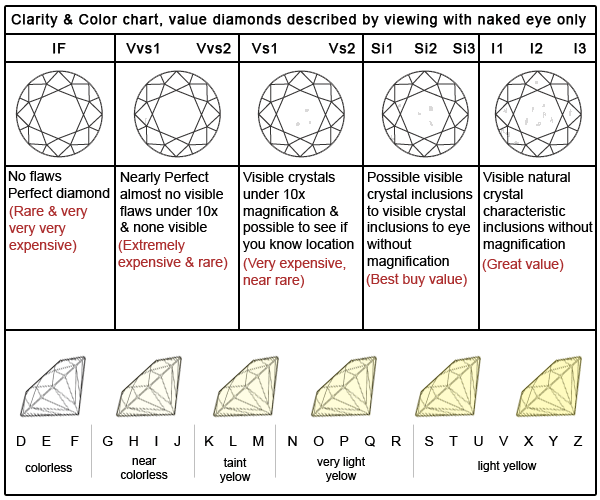

In [13]:
data = pd.read_csv(r"F:\Project_template\notebooks\data\gemstone.csv",index_col='id')
data.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [15]:
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
4152,0.35,Ideal,E,VS2,61.4,56.0,4.55,4.58,2.81,767
18585,0.42,Ideal,D,VS2,61.9,56.0,4.83,4.80,2.98,1314
12794,1.51,Very Good,H,SI1,62.1,56.0,7.27,7.30,4.52,9596
183954,1.20,Ideal,H,SI2,62.7,55.0,6.76,6.79,4.24,6085
121729,0.70,Premium,E,SI1,60.2,58.0,5.78,5.74,3.46,2522


In [16]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [17]:
data.duplicated().sum()

0

Now separate the categorical and numerical data

In [24]:
categorical_columns = data.select_dtypes(include="object")
numerical_columns = data.select_dtypes(exclude= "object")

In [37]:
categorical_columns.describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [36]:
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [35]:
categorical_columns['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [38]:
categorical_columns['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [39]:
categorical_columns['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

NameError: name 'sns' is not defined

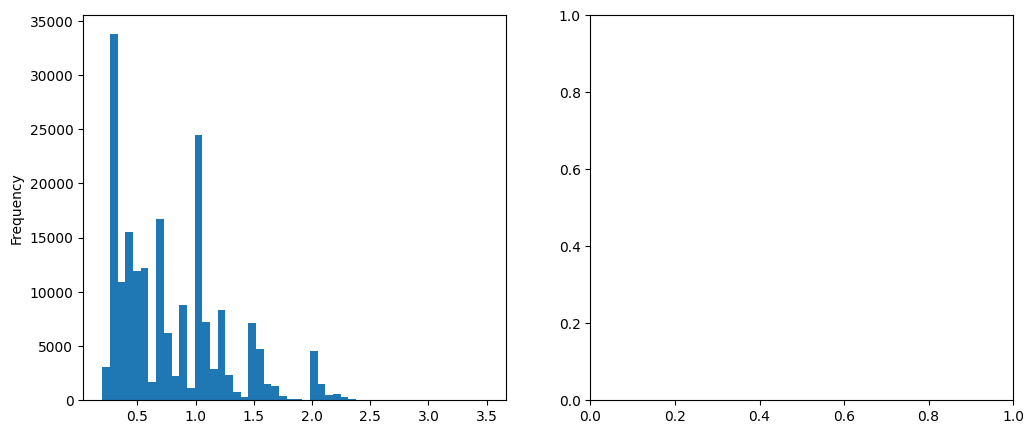

In [59]:
for col in numerical_columns:
    fig,(axes1,axes2) = plt.subplots(1,2,figsize = (12,5))
    numerical_columns[col].plot(kind = "hist",bins = 50,ax = axes1)
    sns.kdeplot(numerical_columns[col],ax = axes1)
    sns.boxplot(numerical_columns[col],ax = axes2,orient = 'h')
    axes1.set(xlabel = col, ylabel = "count")
    axes1.grid()
    plt.xlabel(col)
    plt.show()
